# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Import API key
from config import weather_api_key

# Import citipy library - provides geo coordinates for all available cities with population over 500
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes -open interval
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
#This code gives us list of random cities

# Initialize two lists
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#numpy.random.uniform(low=0.0, high=1.0, size=None) - draws samples from uniform distribution- any value within half open interval (lat_range[0], lat_range[0]] is equally likely to be drawn
#lats creates a random list of latitudes
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs creates a random list of longitudes
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#Merges the above two lists using zip function-to create an object with lats and longs
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# for loop looks at the lat_lng list
for lat_lng in lat_lngs:
    #using nearest_city function of citipy library 
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#city.city_name

636

In [13]:
#cities

['hasaki',
 'bredasdorp',
 'avarua',
 'jamestown',
 'bluff',
 'papara',
 'carnarvon',
 'busselton',
 'georgetown',
 'safwah',
 'niort',
 'grand river south east',
 'pedernales',
 'cidreira',
 'cape town',
 'stange',
 'belushya guba',
 'attawapiskat',
 'yellowknife',
 'dikson',
 'victoria',
 'port elizabeth',
 'ushuaia',
 'vaini',
 'cruzeiro do sul',
 'mataura',
 'butaritari',
 'vikulovo',
 'taolanaro',
 'irece',
 'laguna',
 'punta arenas',
 'toamasina',
 'almaznyy',
 'thompson',
 'port alfred',
 'upernavik',
 'puerto ayora',
 'iwaki',
 'albany',
 'saskylakh',
 'rikitea',
 'toliary',
 'bonthe',
 'ukhta',
 'hobart',
 'maningrida',
 'iqaluit',
 'mahebourg',
 'moosomin',
 'saint-philippe',
 'scalloway',
 'caruray',
 'norman wells',
 'tiksi',
 'navadwip',
 'aksu',
 'hithadhoo',
 'sabzevar',
 'nyagan',
 'richards bay',
 'senneterre',
 'lorengau',
 'mountain home',
 'sogne',
 'artyk',
 'castro',
 'tura',
 'asmara',
 'rehoboth',
 'ondjiva',
 'longyearbyen',
 'dickson',
 'rawannawi',
 'bonavist

In [33]:
url="http://api.openweathermap.org/data/2.5/weather?"

#Standard units are in Kelvin hence conversion-https://openweathermap.org/weather-data
units="imperial"

#Build query url- base url+apikey+units
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [34]:
#cities=["New York", "London","Boslo Fake City","Moscow","Beijing"]

dt=[]
country=[]
lat=[]
lng=[]
cloud=[]
humidity=[]
temp_max=[]
windspeed=[]
#print(cities)

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
for city in cities:
    url= query_url + city
    print(url)
    time.sleep(1)
    try:
        response=requests.get(url).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        dt.append(response["dt"])
        temp_max.append(response["main"]["temp_max"])
        cloud.append(response["clouds"]["all"])   
        humidity.append(response["main"]["humidity"])
        windspeed.append(response["wind"]["speed"])
    except KeyError:
        #print("City not found")
        lat.append(0)
        lng.append(0)
        country.append(city +" Not Found")
        dt.append("")
        temp_max.append(0)
        cloud.append(0)
        humidity.append(0)
        windspeed.append(0)

http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=hasaki
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=avarua
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=jamestown
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=bluff
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=papara
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=busselton
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=georg

http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=rawannawi
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=bonavista
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=labytnangi
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=ponta delgada
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=hermanus
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=caraballeda
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=aylmer
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&u

http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=macusani
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=lagoa
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=jaisalmer
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=havoysund
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=trincomalee
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=neiafu
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=manta
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=necochea
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=atuo

http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=katsuura
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=byron bay
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=faya
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=chicontepec
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=bivolari
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=sangar
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperi

http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=nago
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=constitucion
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=yerbogachen
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=faanui
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=wattegama
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=marv dasht
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=akonolinga
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperi

http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=batagay
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=lucea
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=souillac
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=taburi
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=solwezi
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=pontal do parana
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=geraldton
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=deniliquin
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial

http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=pavino
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=manbij
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=manggar
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=nagato
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=egvekinot
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=lolua
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=tarko-sale
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=patos de minas
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=be

http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=agogo
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=rundu
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=buqayq
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=wenatchee
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=chardara
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=broome
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=urengoy
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=doha
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=obo
http://api.

http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=xinzhou
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=gerash
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=pont-sainte-maxence
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=manitouwadge
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=zyryanka
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=san andres
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=rumphi
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&units=imperial&q=stephenville
http://api.openweathermap.org/data/2.5/weather?appid=ba1219ffcd464fa00b165f783bdbcd4d&un

In [37]:
# print(lat)
# print(lng)
# print(country)
# print(dt)
# print(temp_max)
# print(humidity)
# print(windspeed)
# print(cloud)

[35.73, -34.53, -21.21, 42.1, -46.6, -3.98, -24.87, -33.65, 5.41, 0, 46.33, 0, 18.04, -30.18, -33.93, 60.72, 0, 0, 62.46, 73.51, 22.29, -33.92, -54.8, -21.2, -29.51, -46.19, 3.07, 56.82, 0, -11.3, 38.42, -53.15, -18.17, 48.04, 55.74, -33.59, 72.79, -0.74, 37.05, 42.6, 71.92, -23.12, 0, 7.53, 63.57, -42.88, -12.07, 63.75, -20.41, 50.13, -21.36, 0, 10.31, 65.28, 71.69, 23.42, 41.12, -0.6, 36.21, 62.14, -28.78, 48.38, -2.02, 43.13, 58.08, 0, -24.79, 25.52, 15.33, -23.32, -17.07, 78.22, 36.08, 0, 48.65, 66.66, 37.73, -34.42, -20.34, 10.61, 42.77, 13.22, 38.36, -19.54, -20.67, 0, 22.08, 0, 51.03, -22.97, -33.7, 65.61, 33.73, -25.3, 34.61, 0, -34.48, -21.34, -15.2, -38.27, -34.67, 59.7, 21.47, 51.29, 57.79, -33.02, 70.47, 10.57, -46.28, -20.32, -13.88, 0, 0, 64.57, 37.02, 16.41, -45.58, 45.02, 0, -33.04, 46.62, 7.77, 51.68, -30.6, -46.13, -35.17, 63.05, 68.75, 50.95, 71.29, 0, 18.21, -26.5, 14.9, 5.38, 64.38, 24.91, 21.55, 47.67, 66.83, 68.05, -25.17, 59.63, -9.01, 21.35, -37.62, -14.08, 39.

In [69]:
df=pd.DataFrame({'City': cities, 'Cloudiness (%)': cloud, 'Country': country, 'Date': dt, 'Humidity (%)': humidity, 'Lat': lat, 'Lon': lng, 'Max Temp (F)': temp_max, 'WindSpeed (mph)': windspeed})
print(df)

                  City  Cloudiness (%)                      Country  \
0               hasaki              75                           JP   
1           bredasdorp             100                           ZA   
2               avarua              10                           CK   
3            jamestown              90                           US   
4                bluff              88                           NZ   
..                 ...             ...                          ...   
631          galveston               1                           US   
632         yazoo city               1                           US   
633  pokrovsk-uralskiy               0  pokrovsk-uralskiy Not Found   
634              nioro               9                           GM   
635       vangaindrano              97                           MG   

           Date  Humidity (%)    Lat     Lon  Max Temp (F)  WindSpeed (mph)  
0    1603149160           100  35.73  140.83         51.80           

In [70]:
cleaned_df=df.loc[df["Lat"]!=0]
cleaned_df

,City,Cloudiness (%),Country,Date,Humidity (%),Lat,Lon,Max Temp (F),WindSpeed (mph)
0,hasaki,75,JP,1603149160,100,35.73,140.83,51.80,6.93
1,bredasdorp,100,ZA,1603149009,62,-34.53,20.04,59.00,8.05
2,avarua,10,CK,1603149174,78,-21.21,-159.78,78.80,6.93
3,jamestown,90,US,1603148855,100,42.10,-79.24,51.01,4.70
4,bluff,88,NZ,1603148928,84,-46.60,168.33,50.00,8.99
...,...,...,...,...,...,...,...,...,...
630,sur,4,OM,1603149844,43,22.57,59.53,78.93,10.07
631,galveston,1,US,1603149630,78,29.37,-94.97,80.60,13.87
632,yazoo city,1,US,1603149846,65,32.86,-90.41,78.80,4.38
634,nioro,9,GM,1603149848,62,13.35,-15.75,79.90,4.97


## Convert Raw Data to DataFrame
* Save as csv

In [71]:
#convert df to csv
cleaned_df.to_csv(r'\WeatherPy\final_cities.csv', index = True)

In [66]:
# final_df['Date']=df['Date'].dt.strftime('%m/%d/%y')
# final_df.head()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

In [72]:
%matplotlib notebook

In [73]:
#Dependencies and setup
import matplotlib as pyplot
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [75]:
#Converts the column values of a dataframe to numeric type or list obj
x=pd.to_numeric(df['Lat'])

y=pd.to_numeric(df['Max Temp (F)'])

<IPython.core.display.Javascript object>


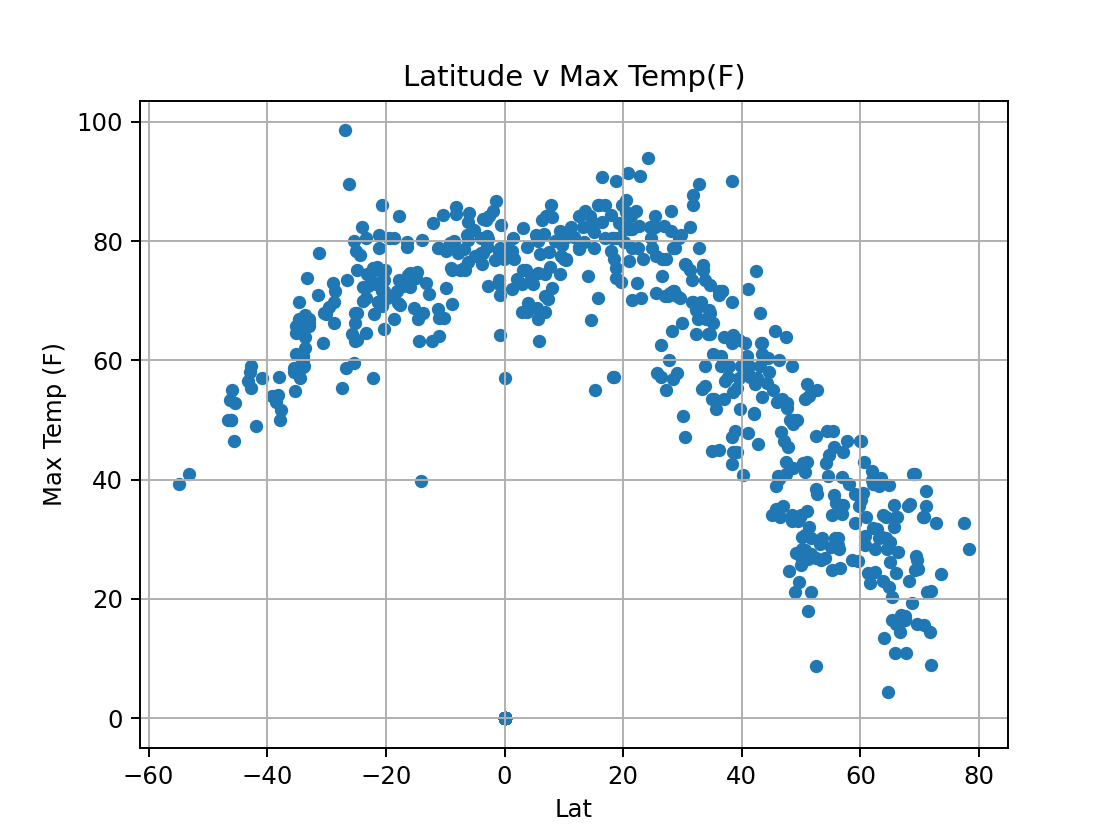

In [89]:
#Scatter plot using pandas
df.plot(kind='scatter',x='Lat', y='Max Temp (F)', grid=True, title="Latitude v Max Temp(F)")
plt.show()
plt.savefig(r"LatvMaxTemp.png")
#add dynamic date to scatter plot title

In [62]:
#Calculating the linear regression
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
# regress_values = x* slope + intercept

### Latitude vs. Humidity Plot

In [78]:
#Converting dataframe columns to numeric
x=pd.to_numeric(df['Lat'])
y=pd.to_numeric(df['Humidity (%)'])

<IPython.core.display.Javascript object>


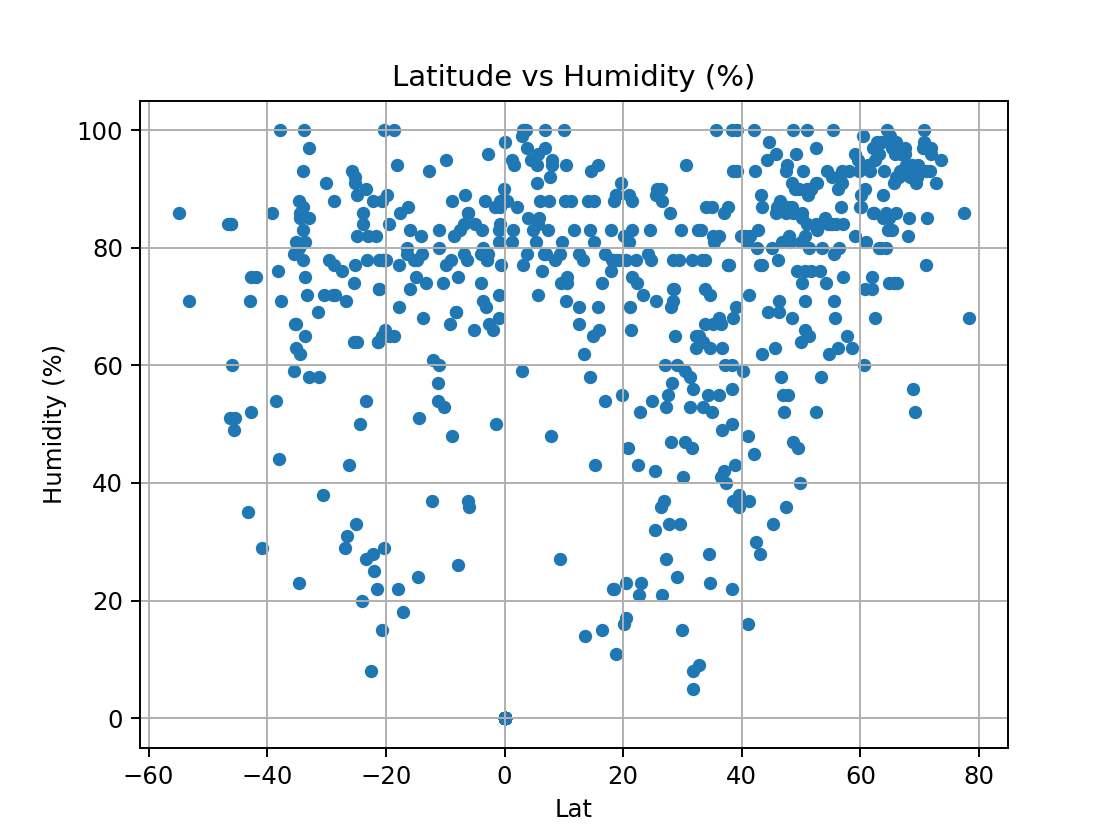

In [90]:
df.plot(kind='scatter', x='Lat', y='Humidity (%)', grid=True, title='Latitude vs Humidity (%)')
plt.show()
plt.savefig(r"LatvHum.png")

### Latitude vs. Cloudiness Plot

In [60]:
# #Converts dataframe columns to numeric so they can be passed as x, y params to generate scatter plots
df['Lat']=pd.to_numeric(df['Lat'])
df['Cloud']=pd.to_numeric(df['Cloudiness (%)'])

<IPython.core.display.Javascript object>


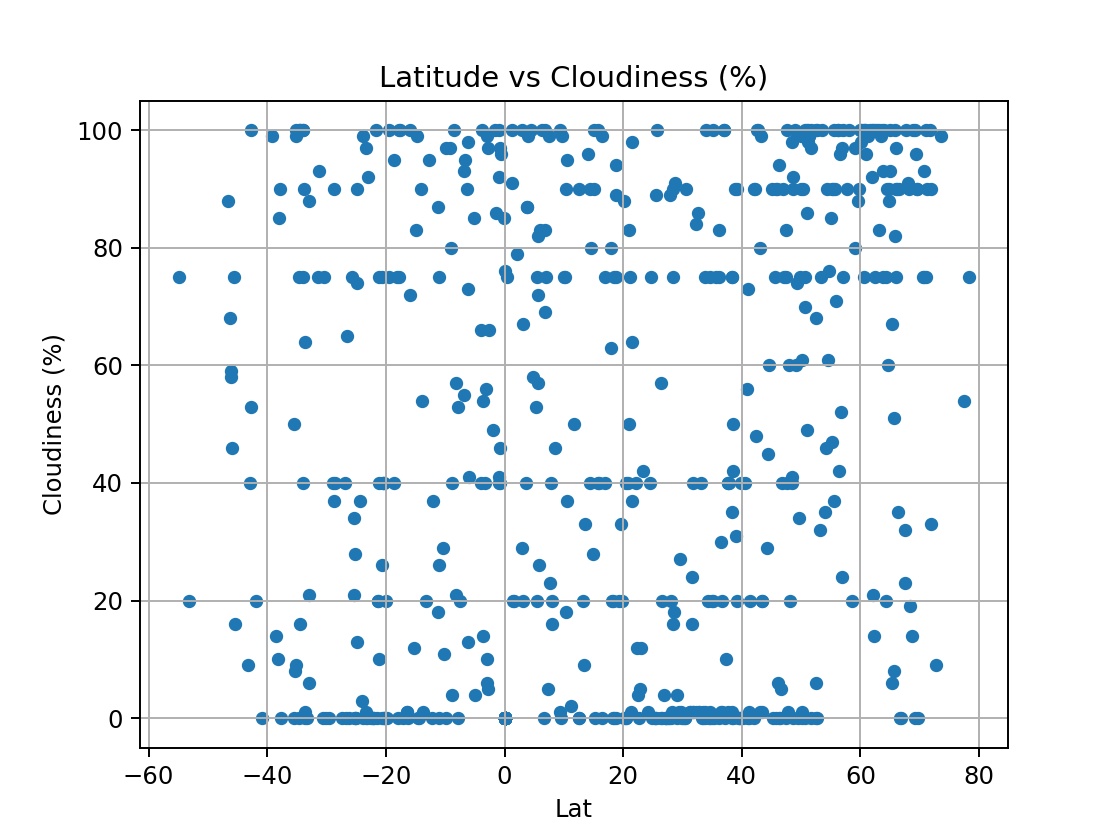

In [91]:
df.plot(kind='scatter', x='Lat' , y='Cloudiness (%)', grid=True, title='Latitude vs Cloudiness (%)')
plt.show()
plt.savefig(r"LatvCloud.png")

### Latitude vs. Wind Speed Plot

In [64]:
df['Lat']=pd.to_numeric(df['Lat'])

df['Wind Speed']=pd.to_numeric(df['WindSpeed (mph)'])

<IPython.core.display.Javascript object>


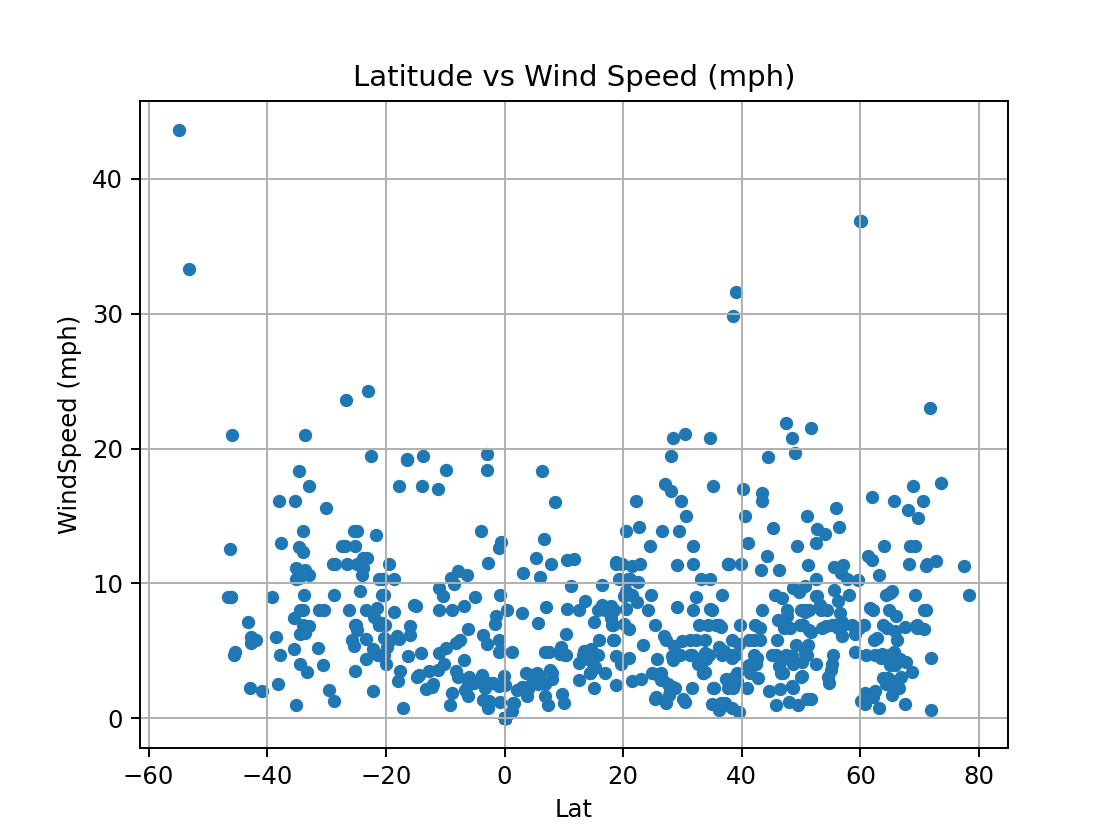

In [92]:
df.plot.scatter(x='Lat', y='WindSpeed (mph)', grid=True, title='Latitude vs Wind Speed (mph)')
plt.show()
plt.savefig(r"LatvWindspeed.png")

## Linear Regression

### Write linear regression plot function (optional)

In [82]:
#new df for northern hemisphere sorted based on lat values
df_nh=cleaned_df.loc[cleaned_df["Lat"]>0]
print(df_nh)

           City  Cloudiness (%) Country        Date  Humidity (%)    Lat  \
0        hasaki              75      JP  1603149160           100  35.73   
3     jamestown              90      US  1603148855           100  42.10   
8    georgetown              20      MY  1603148856            94   5.41   
10        niort              94      FR  1603149182            69  46.33   
12   pedernales              20      DO  1603149185            78  18.04   
..          ...             ...     ...         ...           ...    ...   
629      lompoc               1      US  1603149739            72  34.64   
630         sur               4      OM  1603149844            43  22.57   
631   galveston               1      US  1603149630            78  29.37   
632  yazoo city               1      US  1603149846            65  32.86   
634       nioro               9      GM  1603149848            62  13.35   

        Lon  Max Temp (F)  WindSpeed (mph)  
0    140.83         51.80             6.93

In [83]:
#new df for southern hemisphere sorted based on lat values
df_sh=cleaned_df.loc[cleaned_df["Lat"]<0]
print(df_sh)

                City  Cloudiness (%) Country        Date  Humidity (%)    Lat  \
1         bredasdorp             100      ZA  1603149009            62 -34.53   
2             avarua              10      CK  1603149174            78 -21.21   
4              bluff              88      NZ  1603148928            84 -46.60   
5             papara              40      BR  1603149177            74  -3.98   
6          carnarvon              90      AU  1603148940            82 -24.87   
..               ...             ...     ...         ...           ...    ...   
604       san rafael               0      AR  1603149601            23 -34.62   
608             poum               0      NC  1603149668            66 -20.23   
624  plettenberg bay             100      ZA  1603149838            78 -34.05   
627            brejo              54      BR  1603149841            80  -3.68   
635     vangaindrano              97      MG  1603149849            90 -23.35   

        Lon  Max Temp (F)  

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression